# Problem 1 (70 points)

1. (20 points) Implement in Matlab/Python the Monte Carlo algorithm seen in class for pricing a European call option.

In [30]:
import numpy as np
import math
def MonteCarloAlgo(s, r, sigma, T, K, n):
    
    # generate Si(T) with given parameters and standard normal distribution
    S = np.zeros(n)
    S += (r - 0.5*(sigma**2))*T
    for i in range(len(S)):
        S[i] += sigma*(T**(0.5))*np.random.standard_normal()
    S = np.exp(S)
    S = s*S

    # calculate Ci
    C = S - K
    # keeping only positive values
    C = np.positive(C[C > 0])
    C = math.exp(-1.0*r*T)*C
    
    # calculate estimate Cn
    Cn = np.sum(C) / (n*1.0)
    return Cn
    
    
MonteCarloAlgo(5.0, 0.02, 1.0, 5.0, 4.0, 5000)
    

4.2990895799462185

2. (5 points) Use your algorithm to compute the value at time 0 of a
European call with maturity T = 1 year and strike price K = 100,
for the current stock price S0 = 110, assuming that the annualized
parameters are r = 0.01, σ = 0.2.

In [31]:
MonteCarloAlgo(110.0, 0.01, 0.2, 1.0, 100.0, 1000000)

14.939942404410699

3. (5 points) Compare your above result with the exact value provided by
the analytical formula seen in class for n = 10, 000, n = 100, 000 and
n = 1, 000, 000 sample paths.

In [32]:
import scipy.stats as stats
def callOptionPriceAnalytical(s, r, sigma, T, K):
    dminus = (math.log(s/K*1.0) + (r-(sigma**2)/2)*T)/(sigma*(T**(0.5)))
    dplus = dminus + sigma*(T**(0.5))
    
    value = s*stats.norm(0, 1).cdf(dplus) - math.exp(-1.0*r*T)*K*stats.norm(0, 1).cdf(dminus)
    
    return value

# finding the value of the european call option using analytical formula
VAnaltical = callOptionPriceAnalytical(110.0, 0.01, 0.2, 1.0, 100.0)

# finding the value of the option using monte carlo simulation with

# n= 10000
V10000 = MonteCarloAlgo(110.0, 0.01, 0.2, 1.0, 100.0, 10000)

# n= 100000
V100000 = MonteCarloAlgo(110.0, 0.01, 0.2, 1.0, 100.0, 100000)

# n= 1000000
V1000000 = MonteCarloAlgo(110.0, 0.01, 0.2, 1.0, 100.0, 1000000)

print("The value of the option analytically is : ", VAnaltical)

print("The Value of the option with Monte Carlo and n = 10000", V10000)

print("The Value of the option with Monte Carlo and n = 100000", V100000)

print("The Value of the option with Monte Carlo and n = 1000000", V1000000)
    

The value of the option analytically is :  14.944704023535394
The Value of the option with Monte Carlo and n = 10000 14.763637716096413
The Value of the option with Monte Carlo and n = 100000 14.99064360249918
The Value of the option with Monte Carlo and n = 1000000 14.957956057263022


# As we can see, the the value of the option by simulations is pretty close to the the actual analytical value of 14.94

A cash-or-nothing Binary call option pays nothing if the price ends up
below the strike price and pays fixed amount Q if it ends up above the
strike price. Its payoff function is thus
VT = χ{ST ≥K}Q
where χ{ST ≥K}, the indicator function, is defined by
χ{ST ≥K} =
{ 1 if ST ≥ K
0 Otherwise

4. (5 points) Modify your algorithm to compute the price of a Binary call
option with a cash-or-nothing payoff.

In [33]:
def MonteCarloAlgoNew(Q, s, r, sigma, T, K, n):
    
    # generate Si(T) with given parameters and standard normal distribution
    S = np.zeros(n)
    S += (r - 0.5*(sigma**2))*T
    for i in range(len(S)):
        S[i] = sigma*(T**(0.5))*np.random.standard_normal()
    S = np.exp(S)
    S = s*S

    # calculate Ci
    C = S - K
    # keeping only positive values
    C = np.positive(C[C > 0])
    Cnew = np.zeros(len(C)) + Q
    Cnew = math.exp(-1.0*r*T)*Cnew
    
    # calculate estimate Cn
    Cn = np.sum(Cnew) / (n)
    return Cn

5. (5 points) Compute the value of the call at time 0 for the following
parameters:
K = 100, T = 1, σ = 0.20, Q = 1, S0 = 110, r = 0.01.

In [34]:
MonteCarloAlgoNew(1.0, 110, 0.01, 0.2, 1.0, 100.0, 1000000)

0.6763753150719205

6. (15 points) Derive a price in closed form for the cash-or-nothing call at
time t when the value of the stock is s.

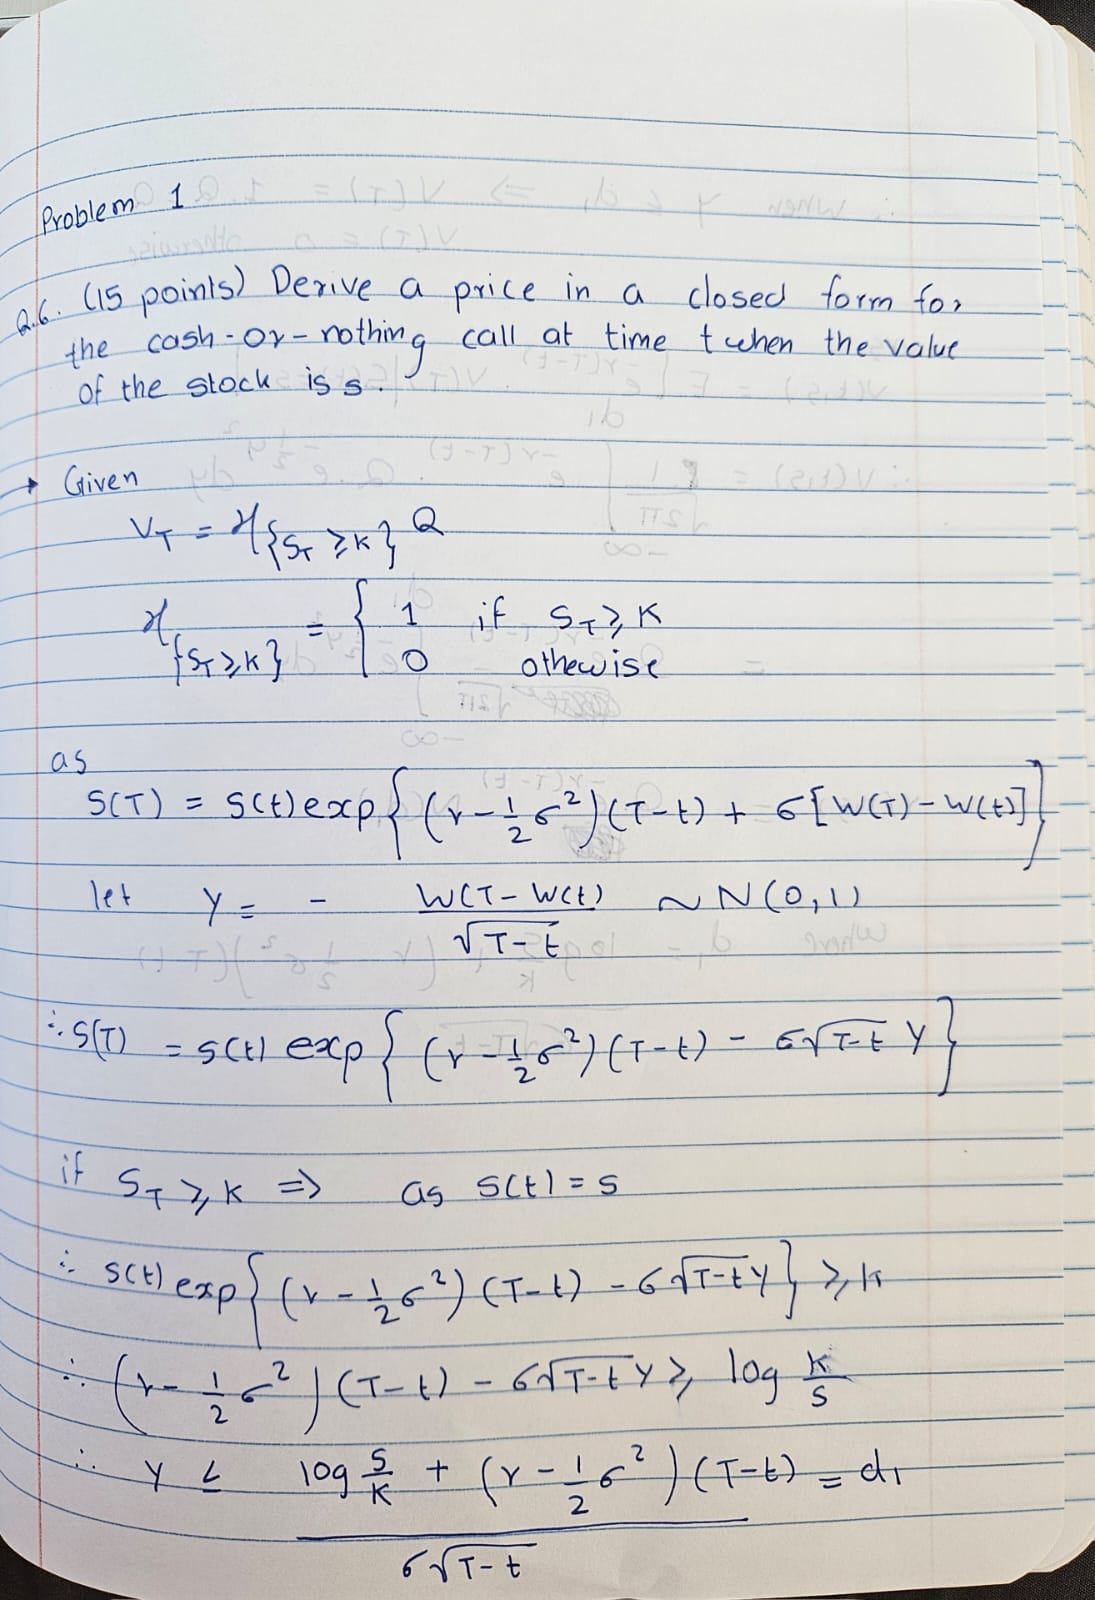

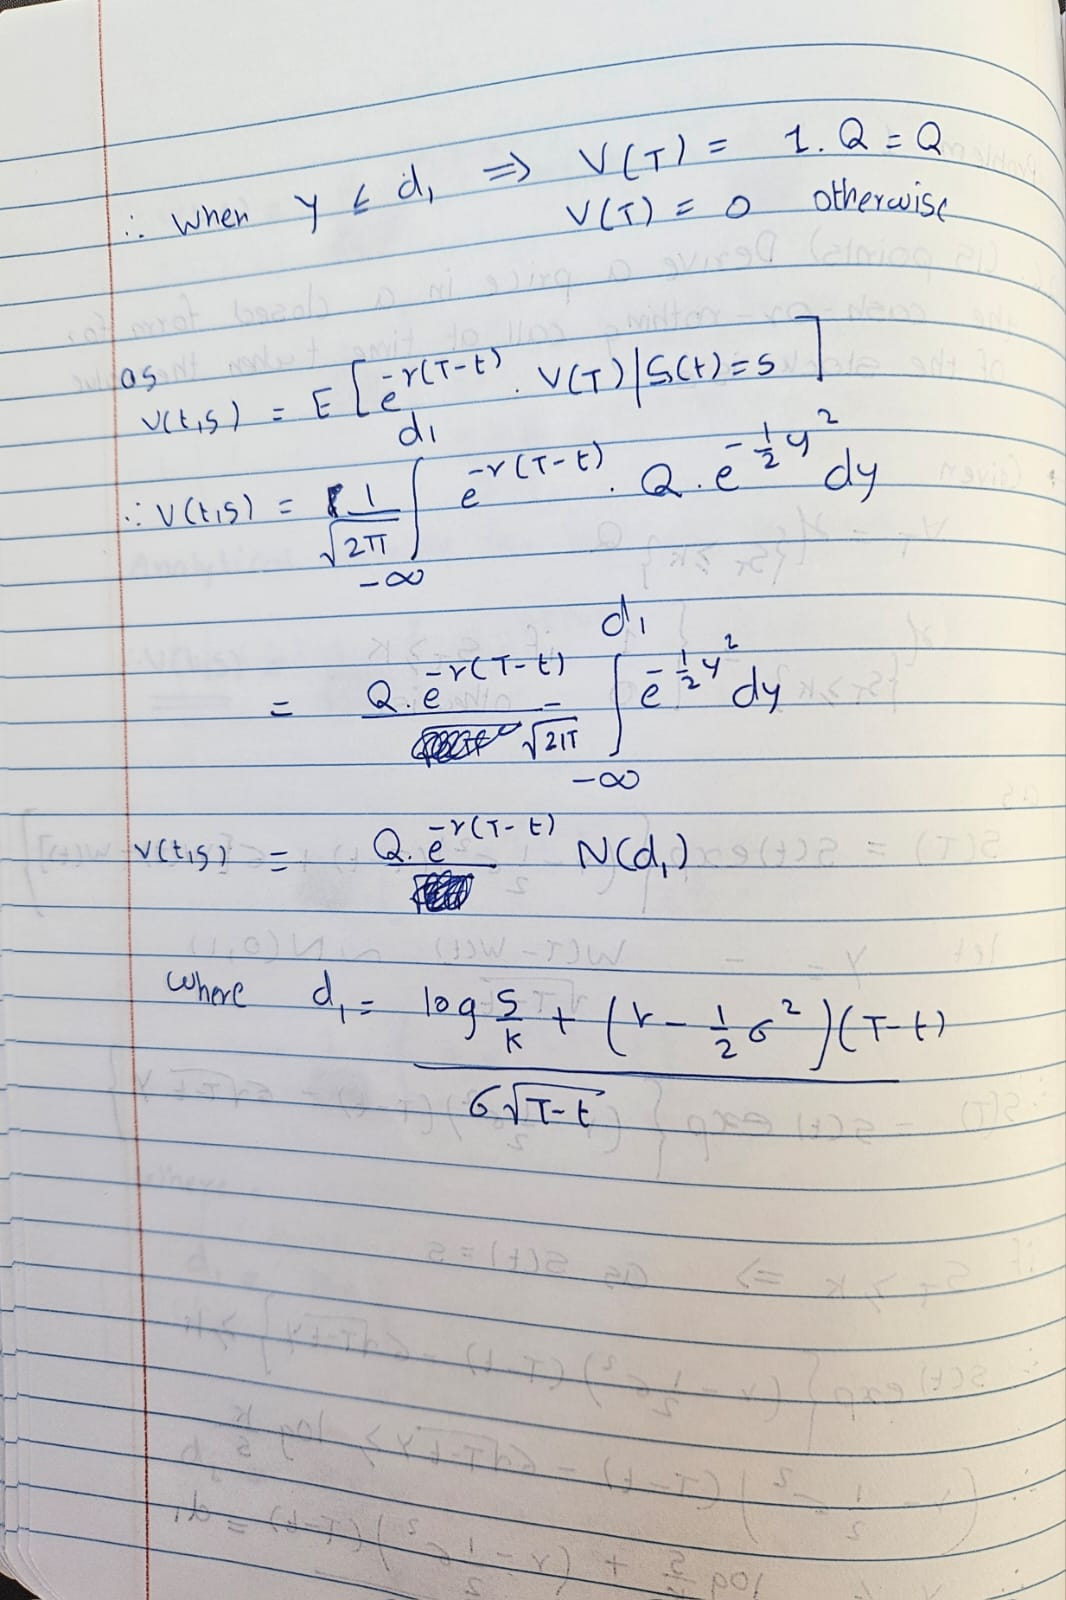

7. (10 points) Compute the numerical value of this call option for the
parameters
r = 0.01, S0 = 110, K = 100, T = 1, σ = 0.2, Q = 1,
by using the analytical formula you derived in the previous question.

In [41]:
def callOptionPriceAnalyticalNew(Q, s, r, sigma, T, K):
    d1 = (math.log(s/K*1.0) + (r-(sigma**2)/2)*T)/(sigma*(T**(0.5)))
    
    value = (Q*math.exp(-1.0*r*T)*stats.norm(0, 1).cdf(d1))
    
    return value


In [43]:
callOptionPriceAnalyticalNew(1.0, 110.0, 0.01, 0.2, 1, 100.0)

0.658528445322734

8. (5 points) Compare your answer with the answer you obtained by using
Monte Carlo simulations.

In [28]:
# Answer by simulation is 0.676 and by analytical formula is 0.658. 
# This shows that if we use monte carlo simulation,
# with sufficiently large n(iterations - 1000000 in our case) 
# our simulation results will match the analytical answers pretty accurately

# Problem 2

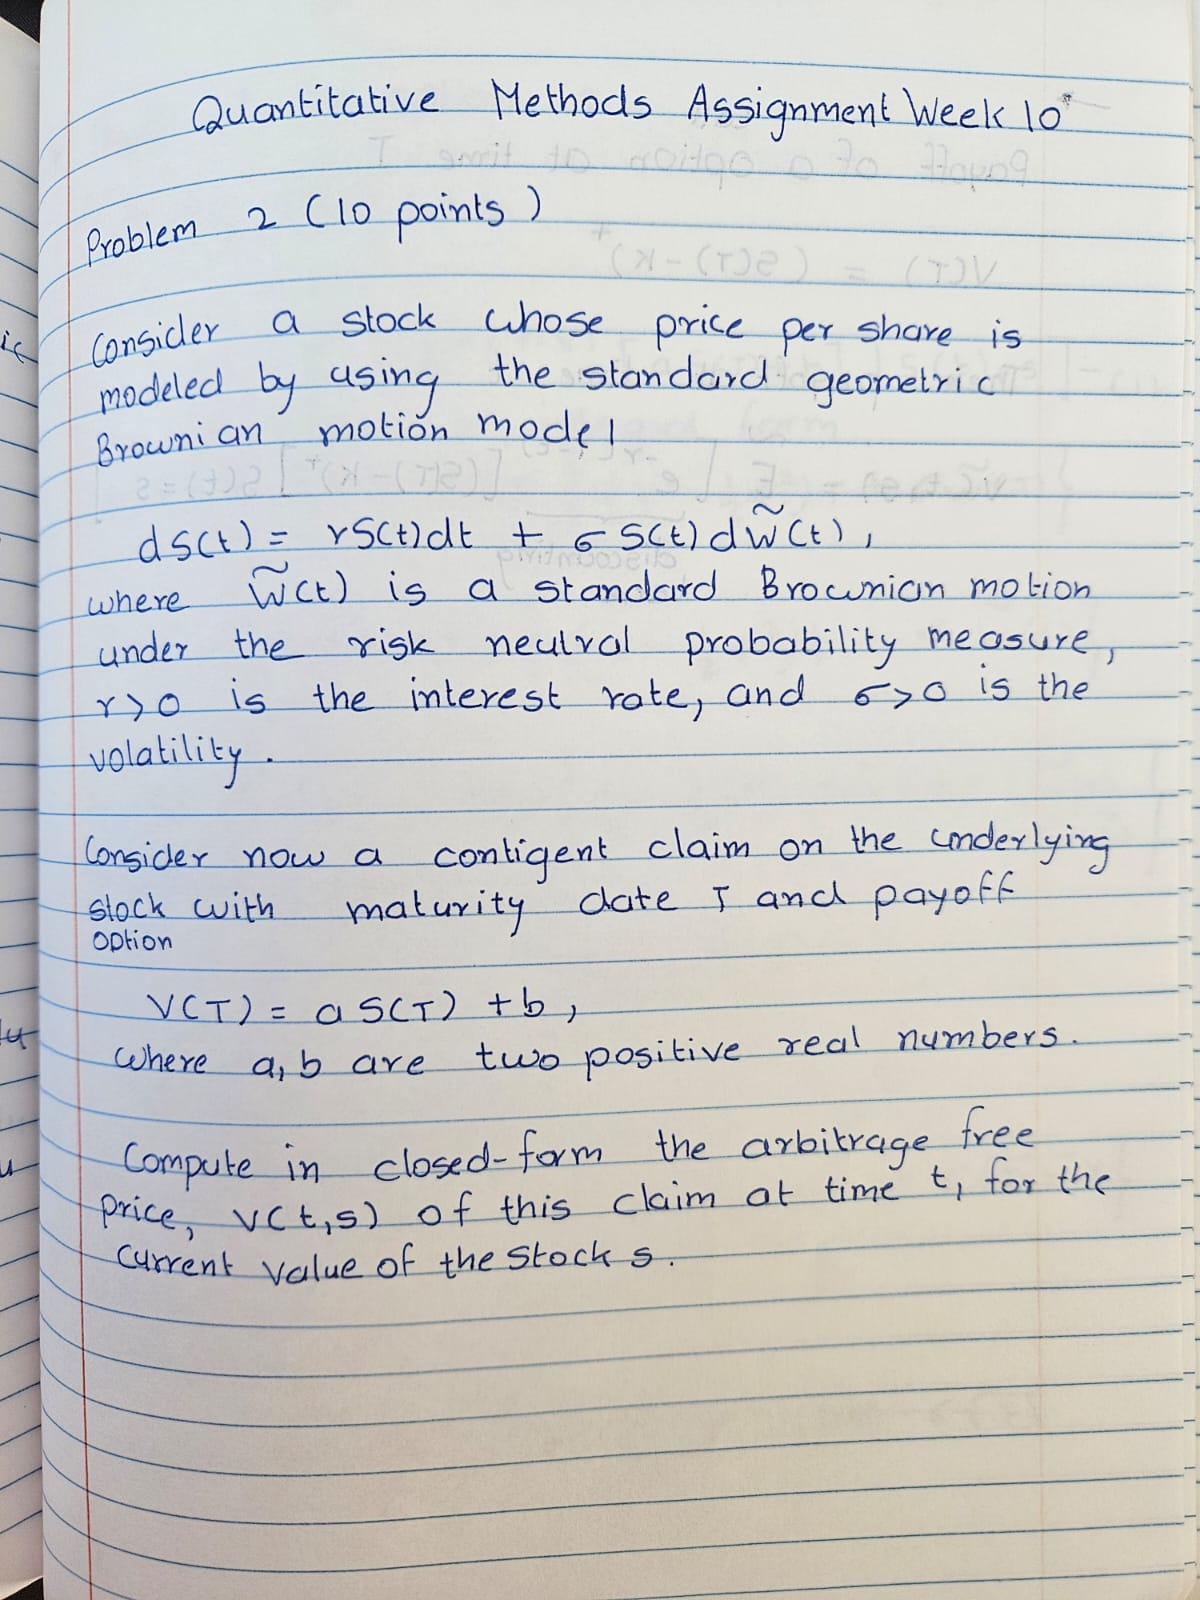

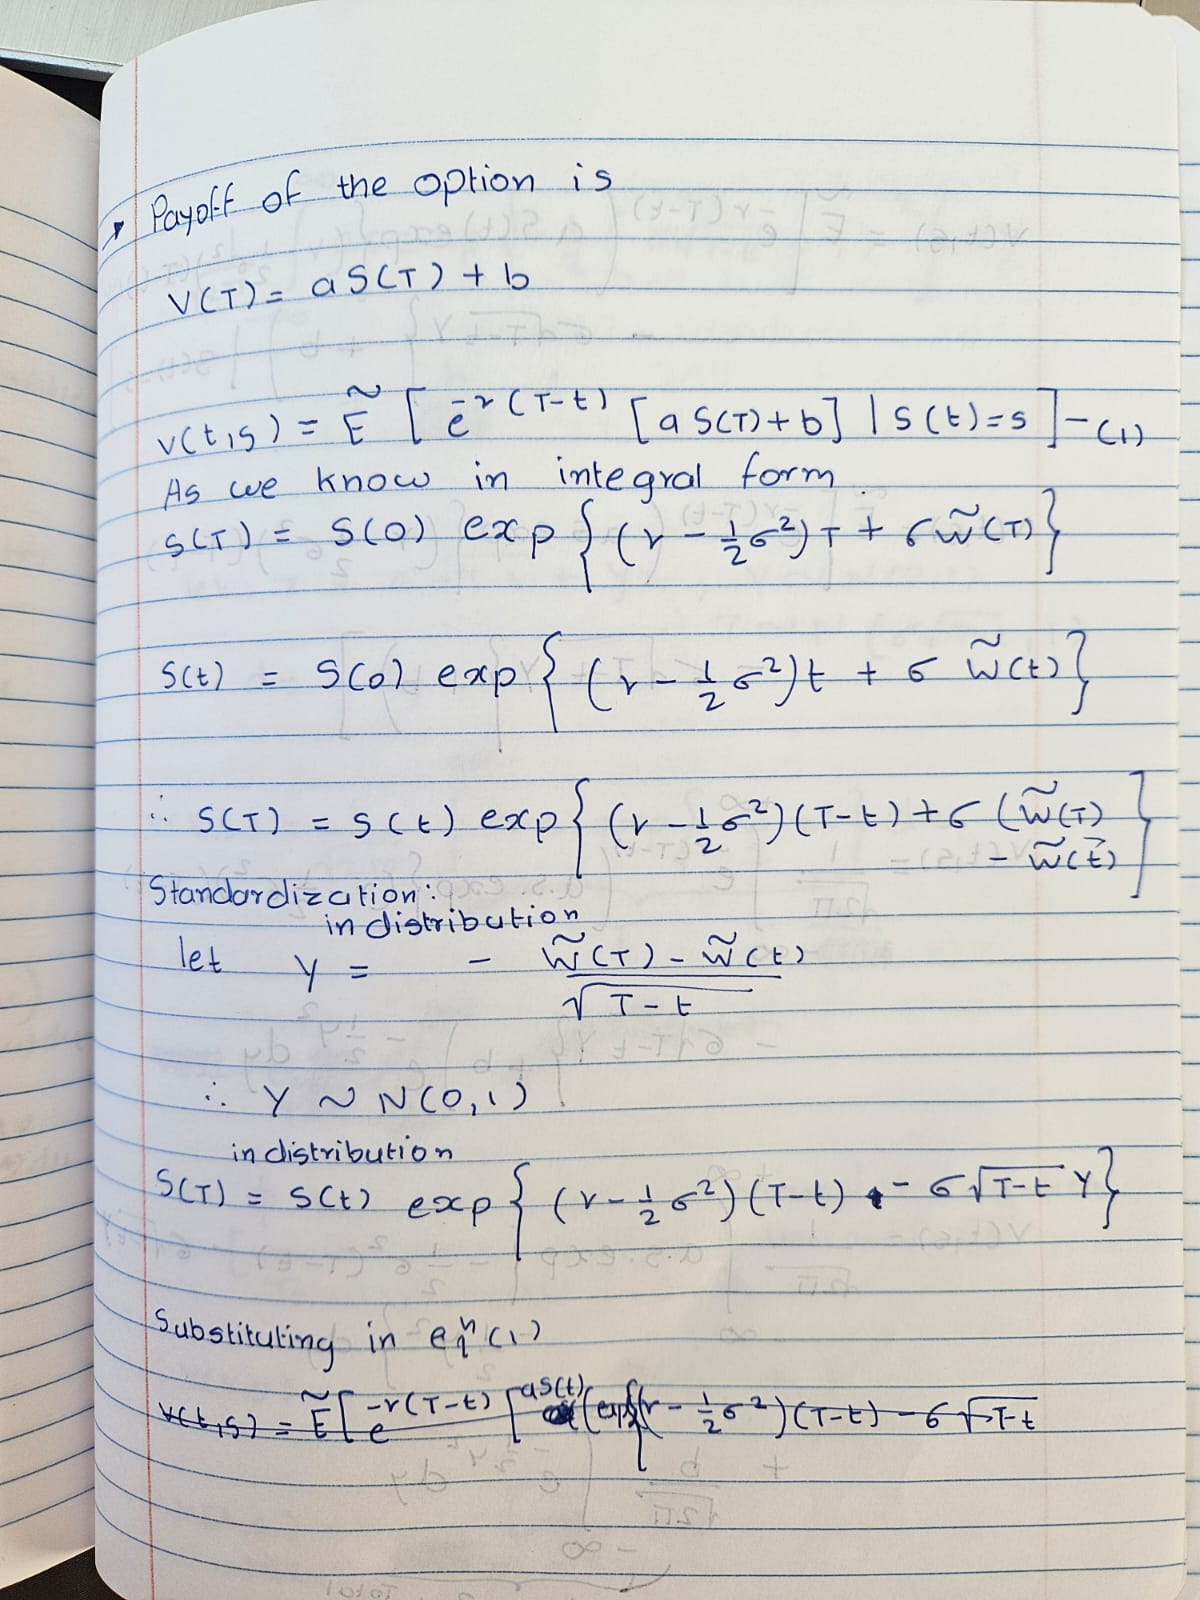

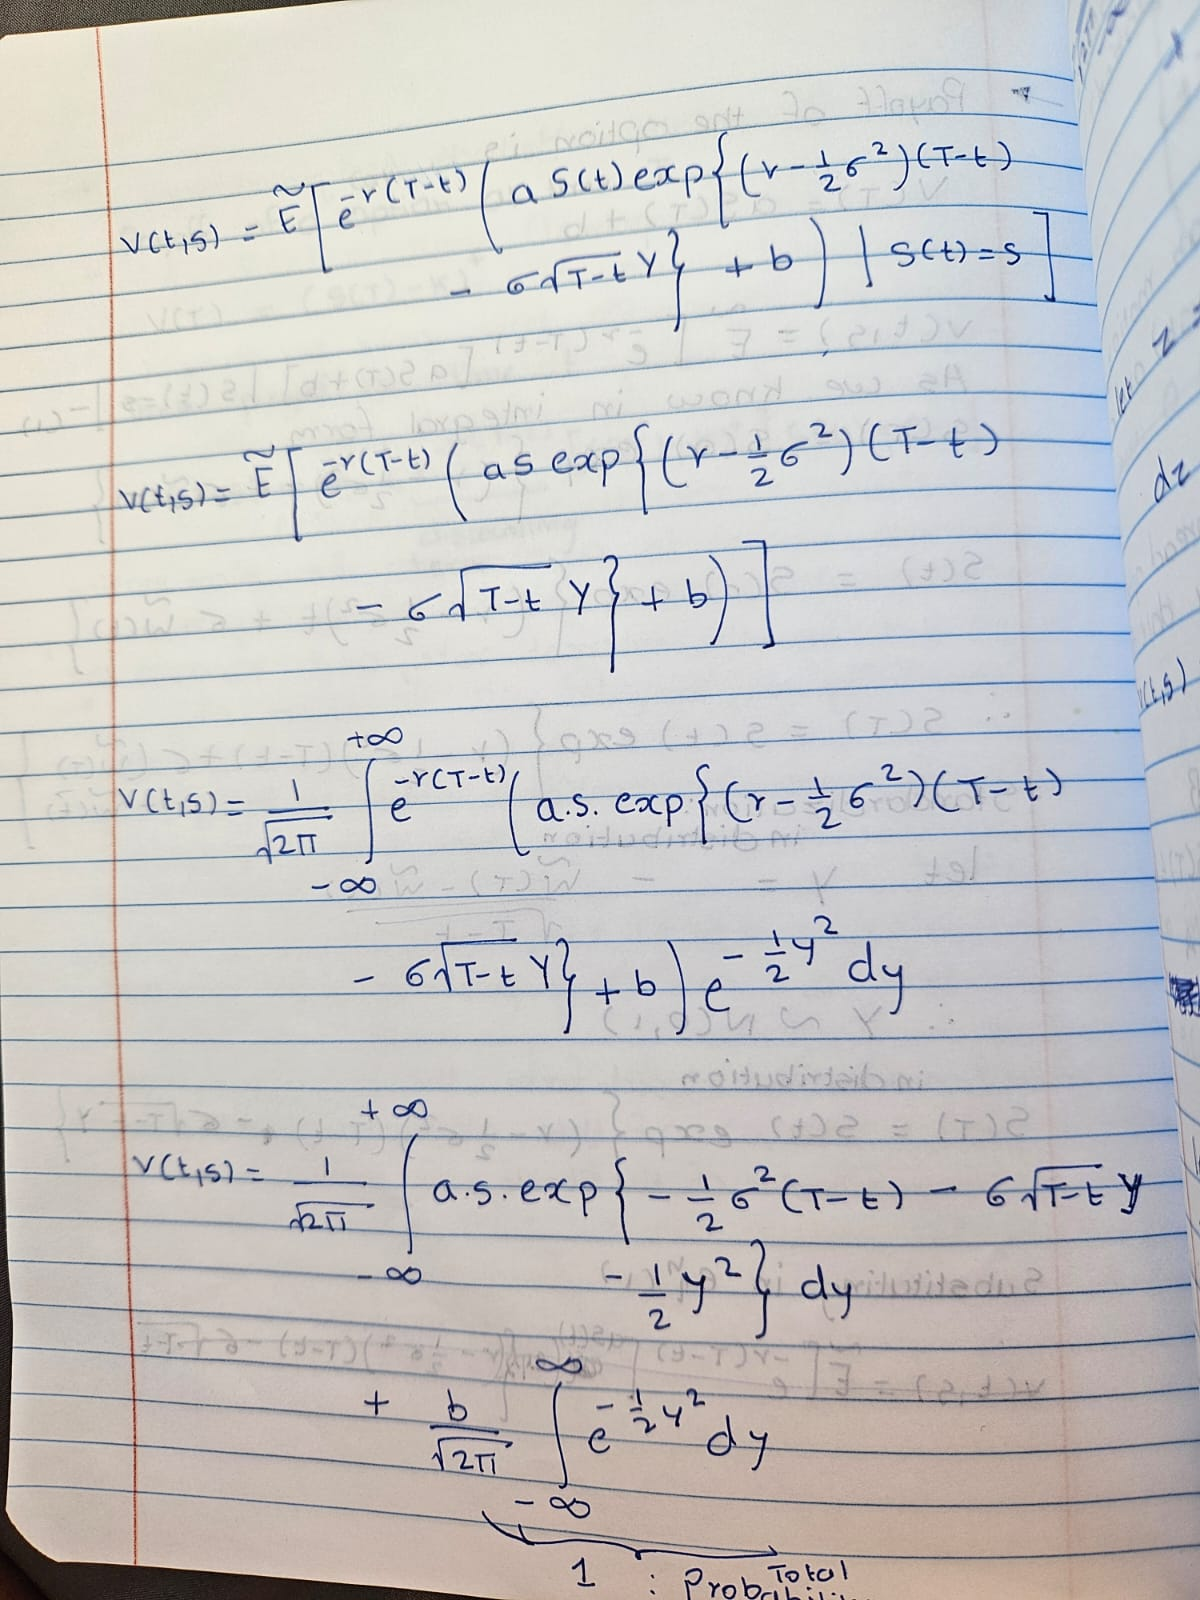

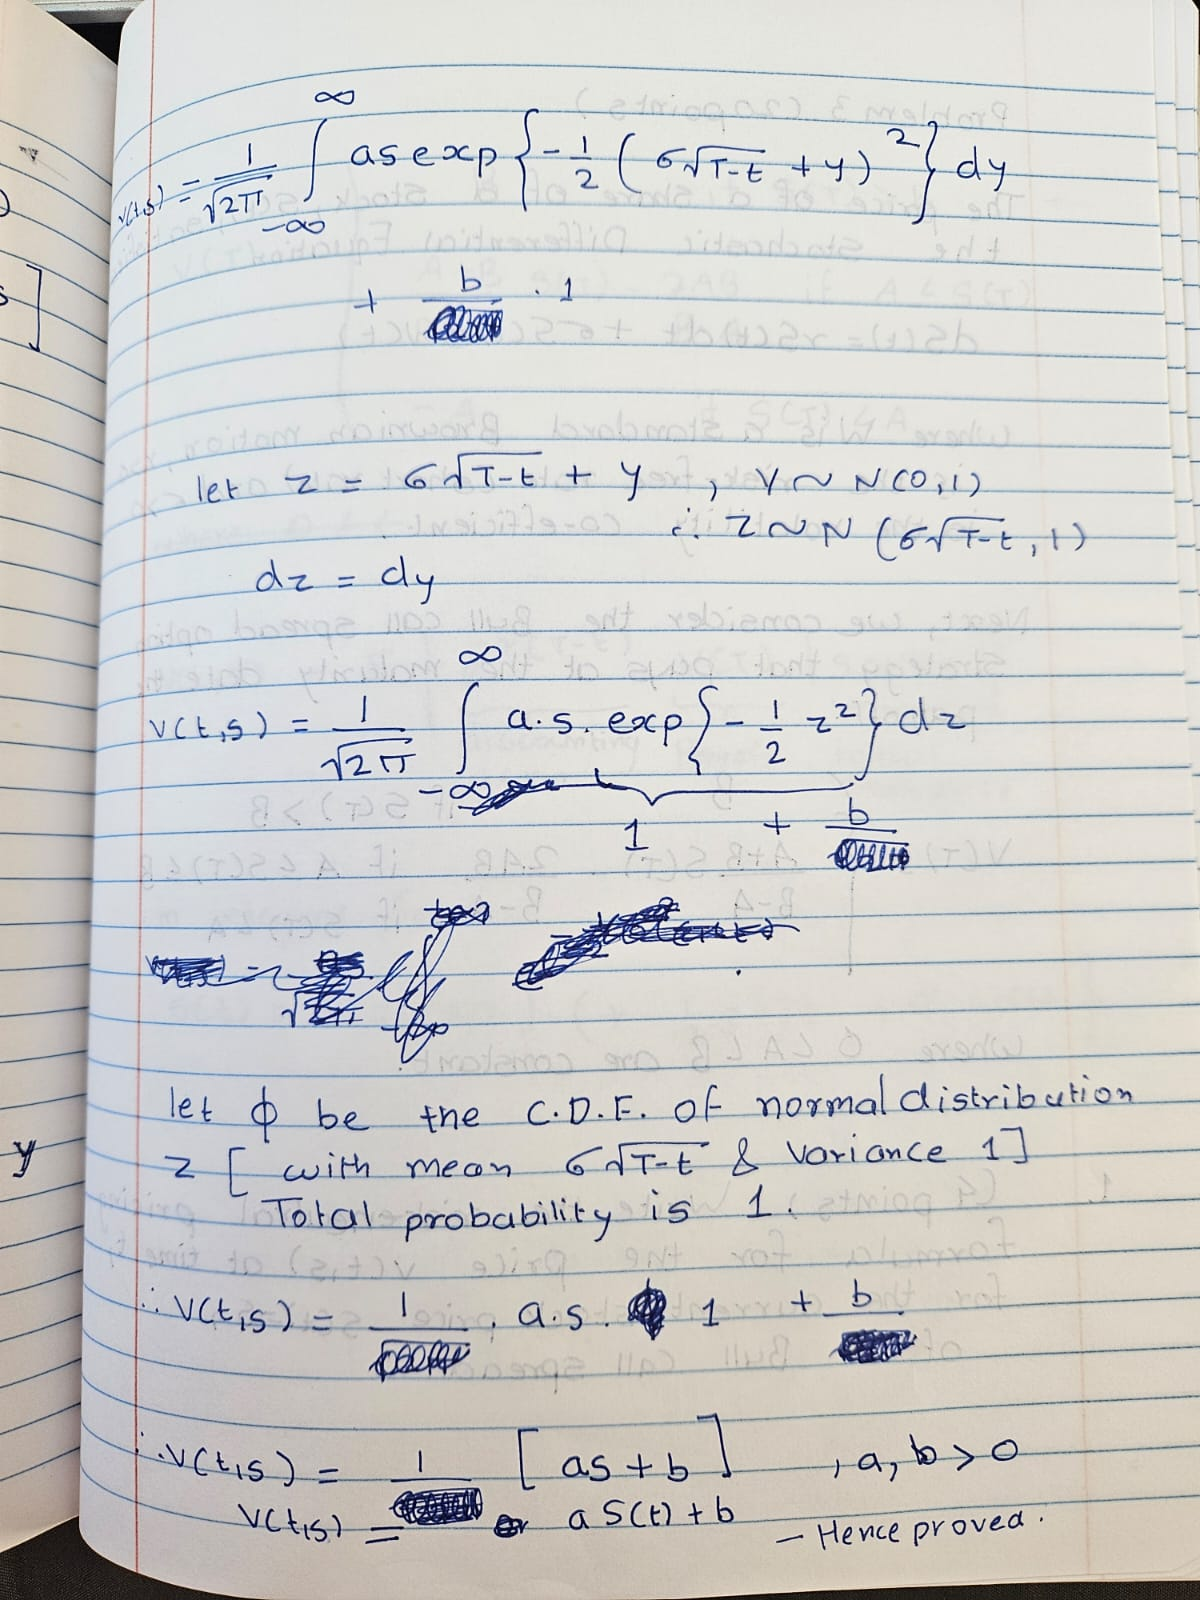

# Problem 3 

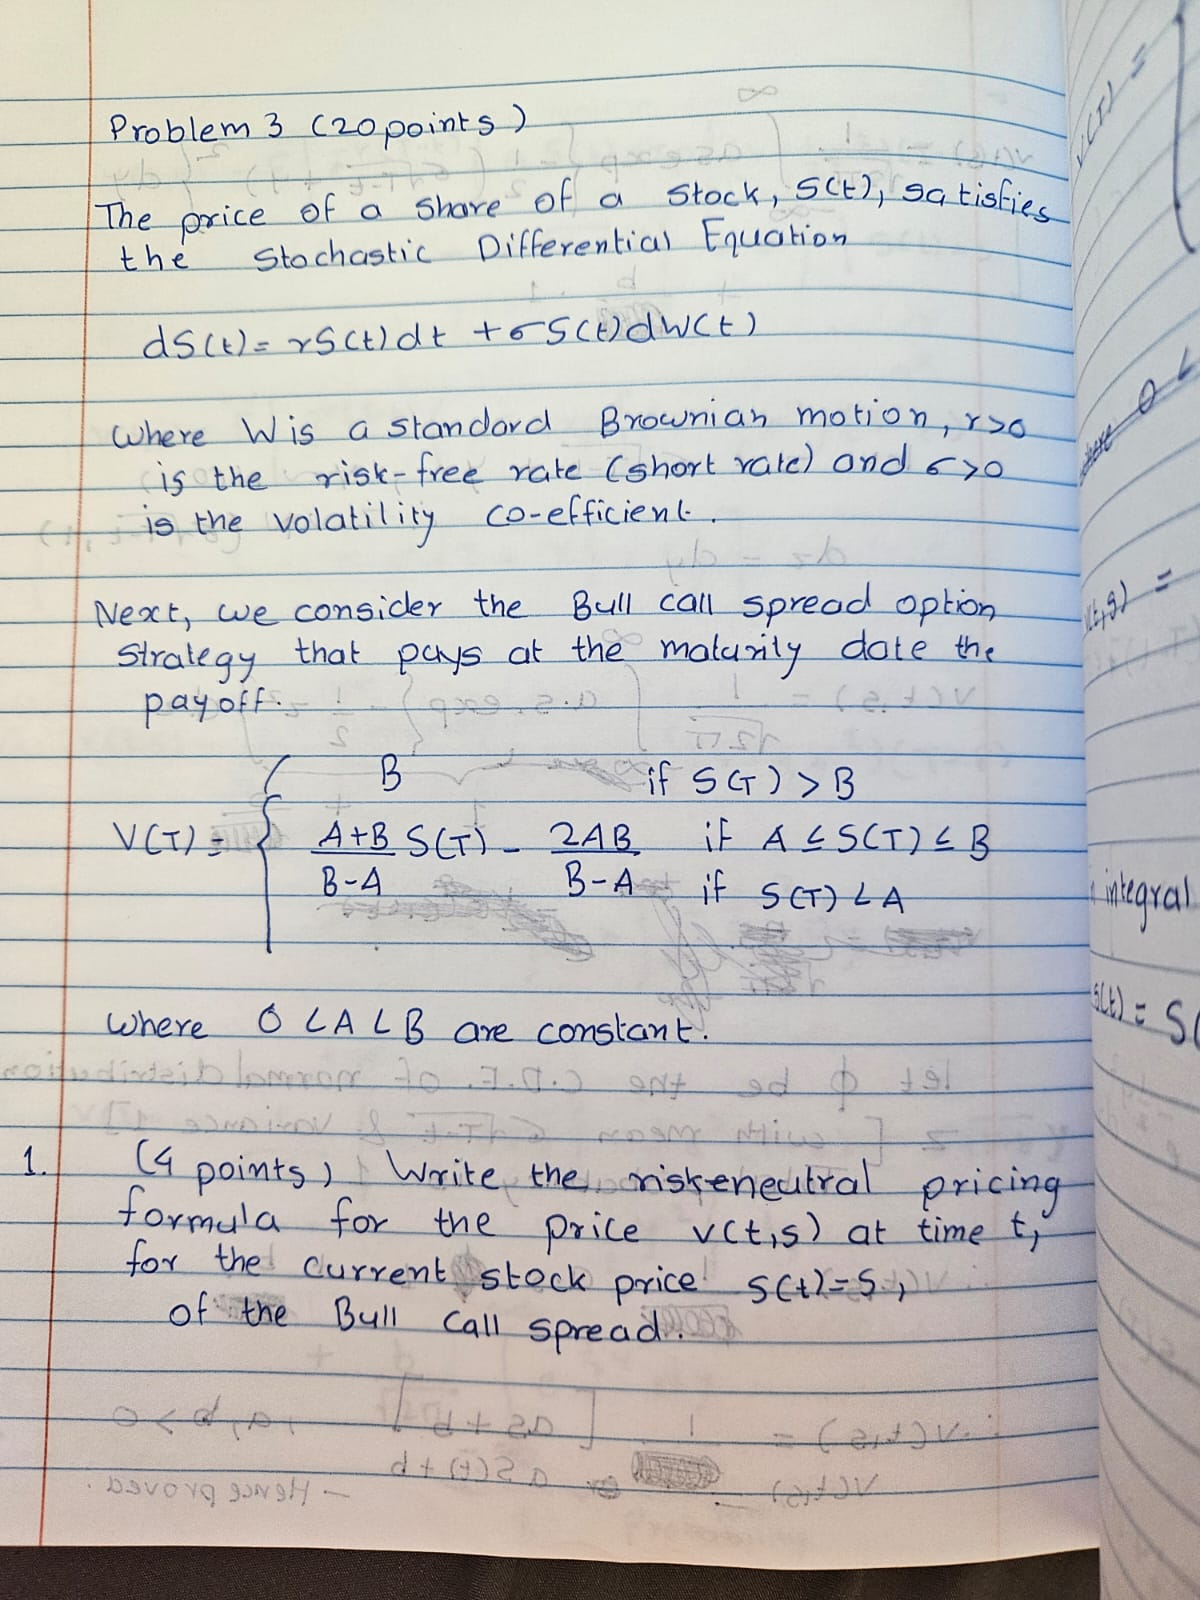

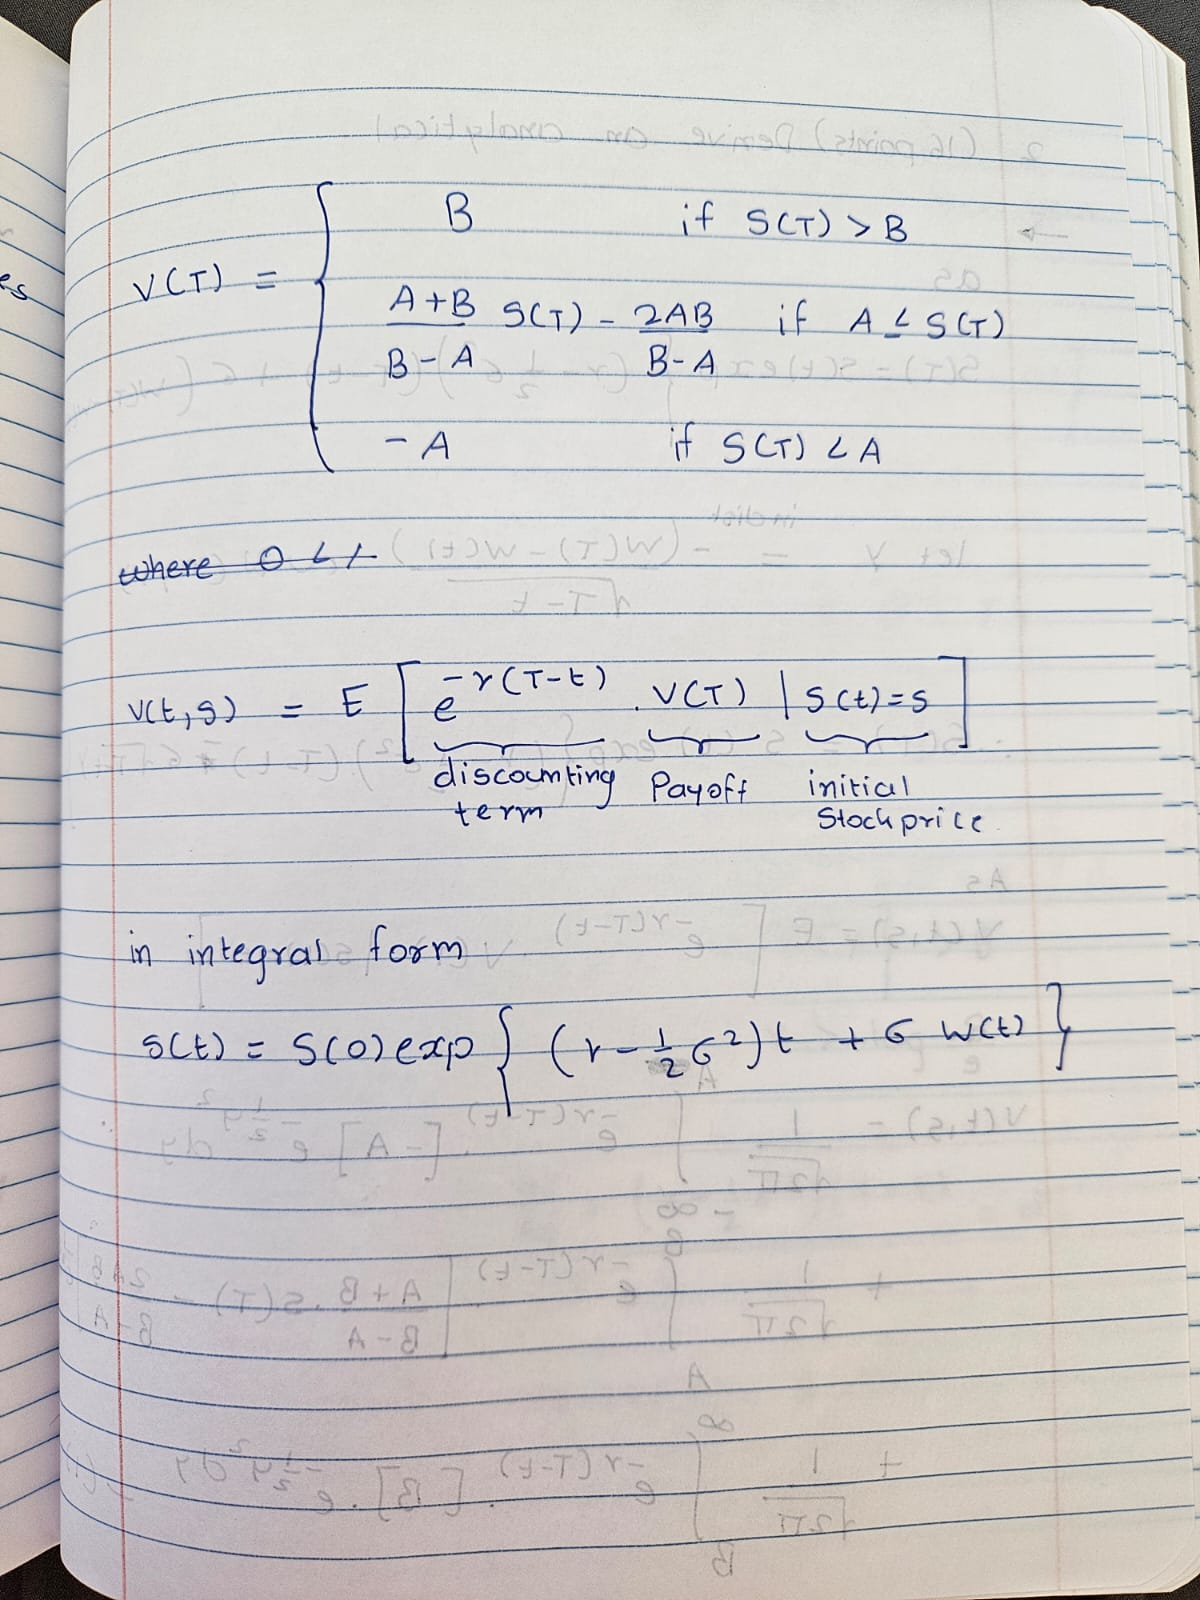

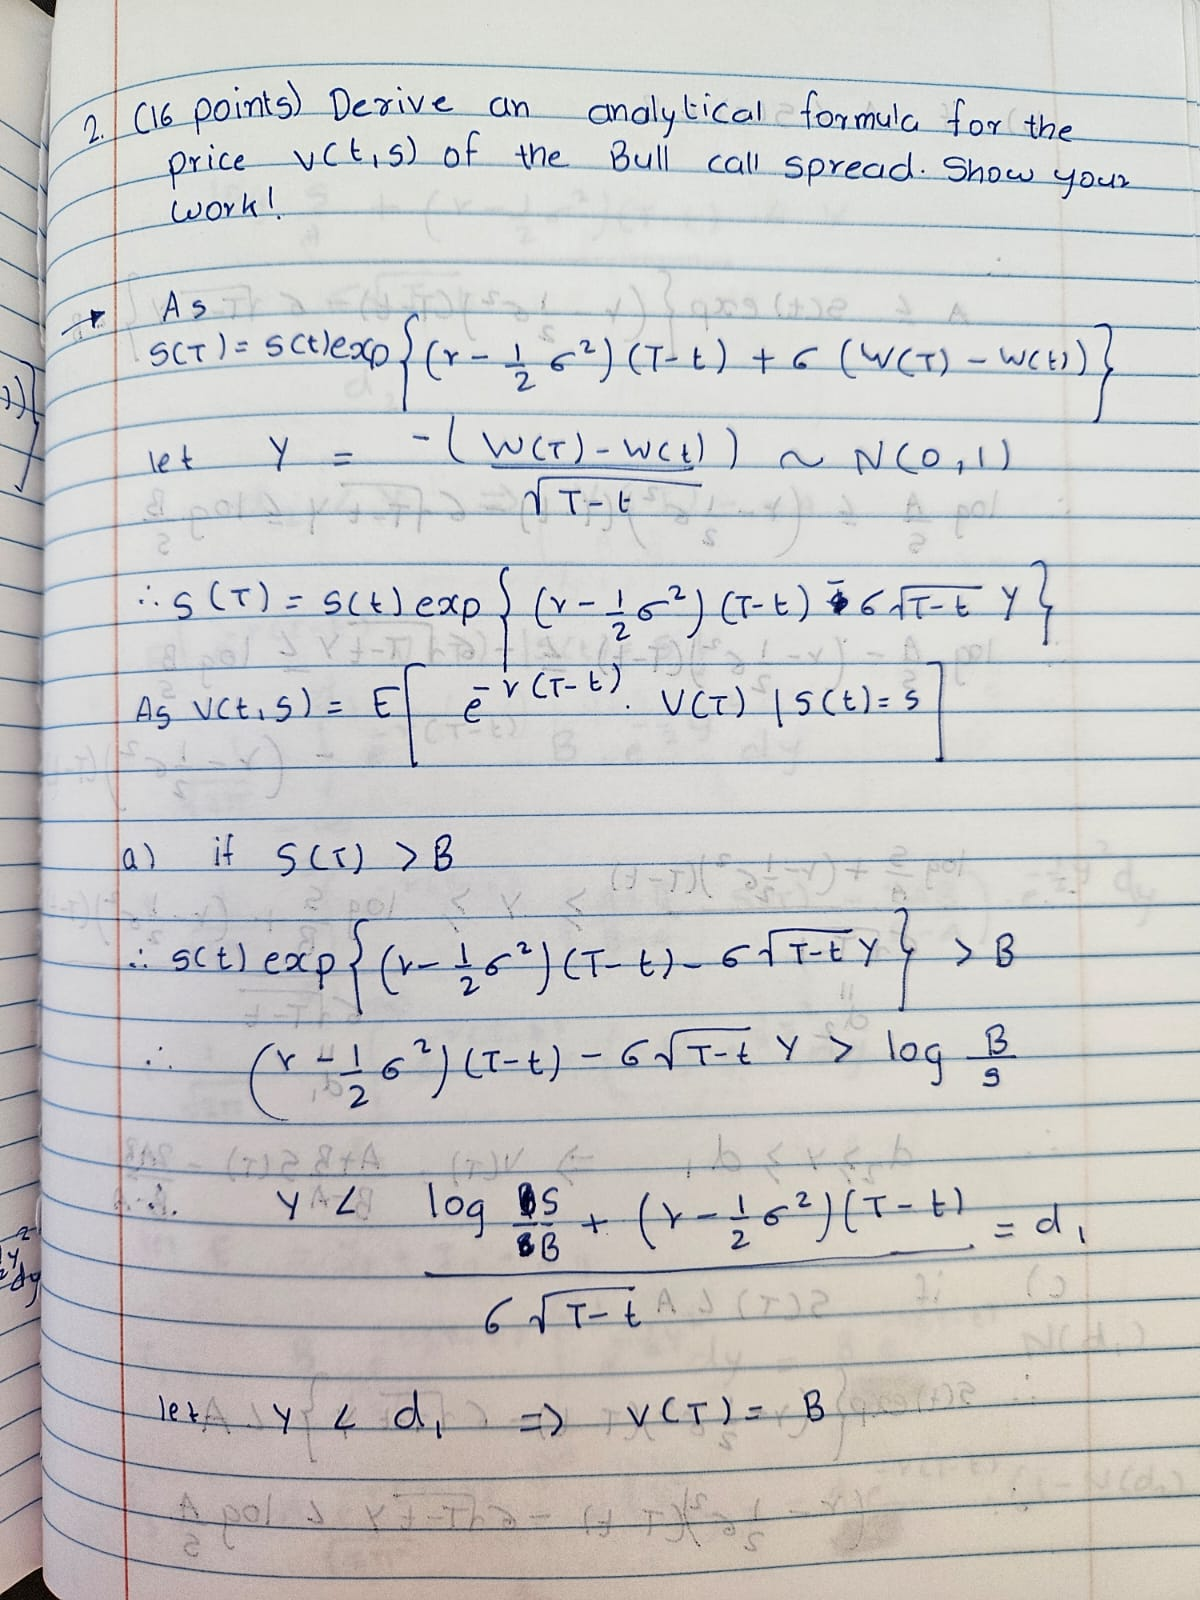

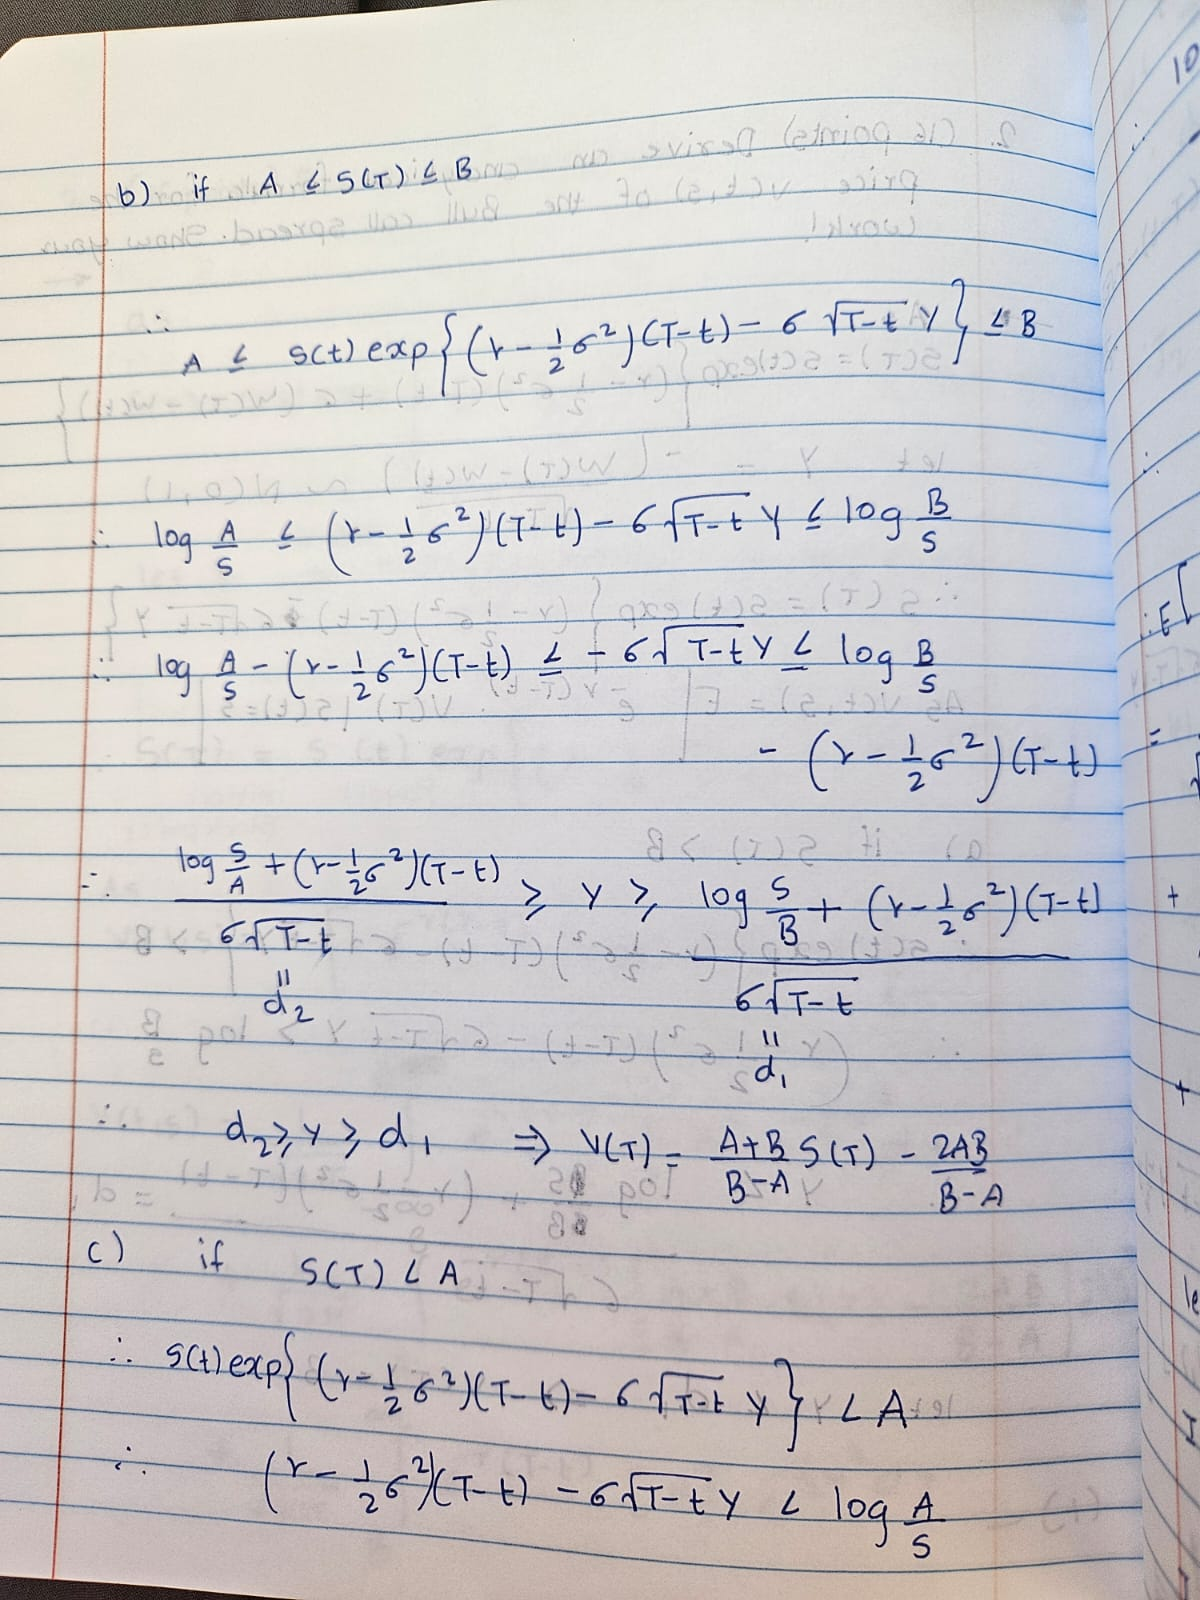

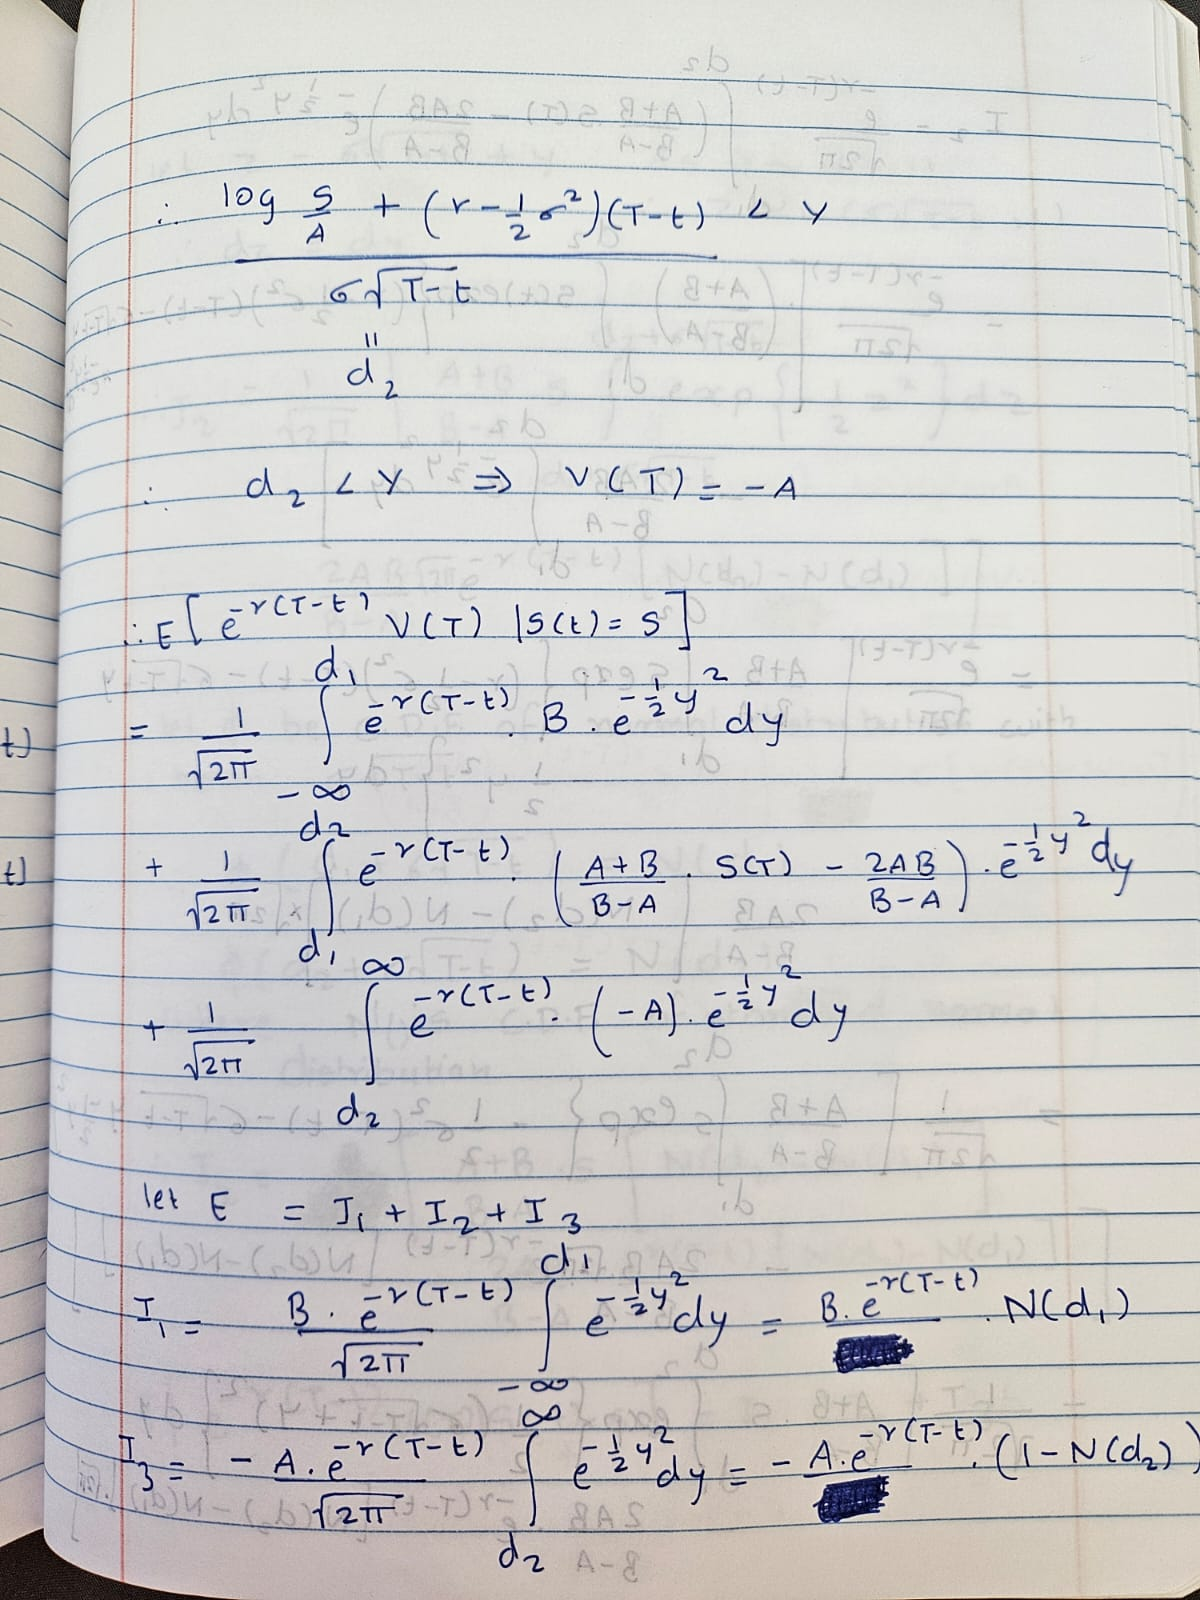

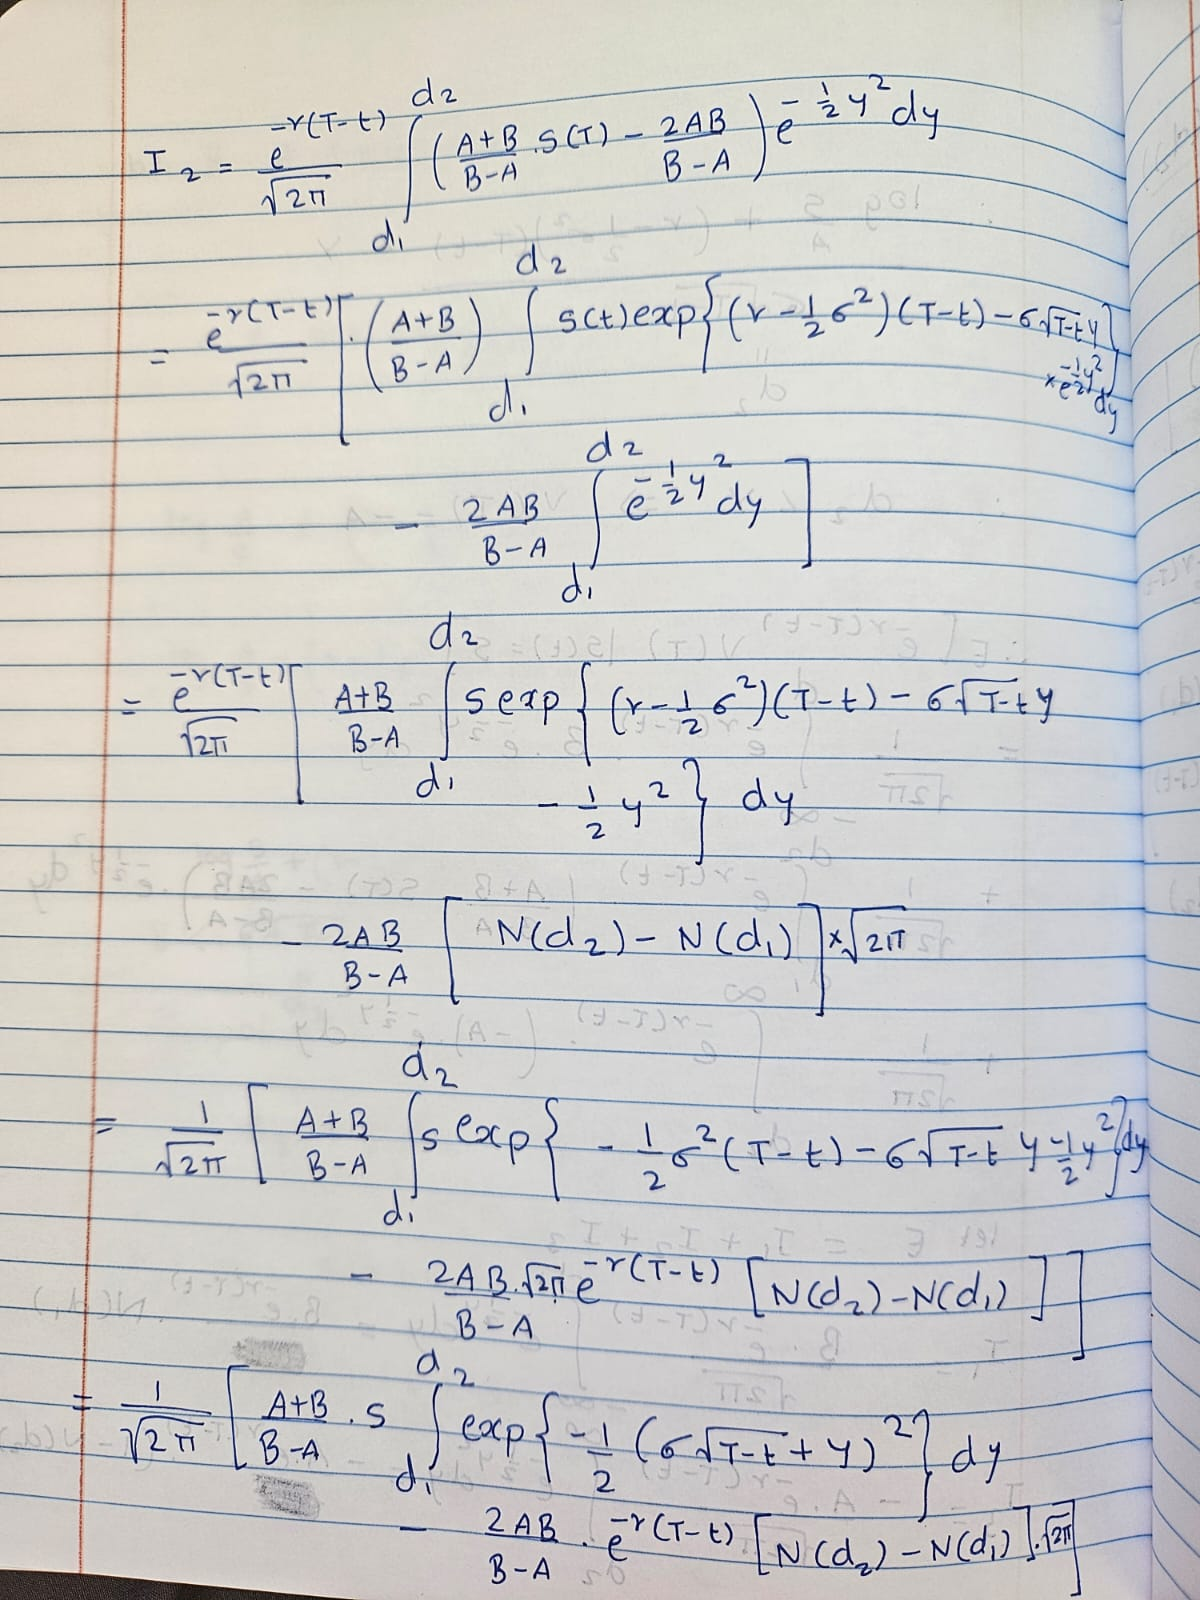

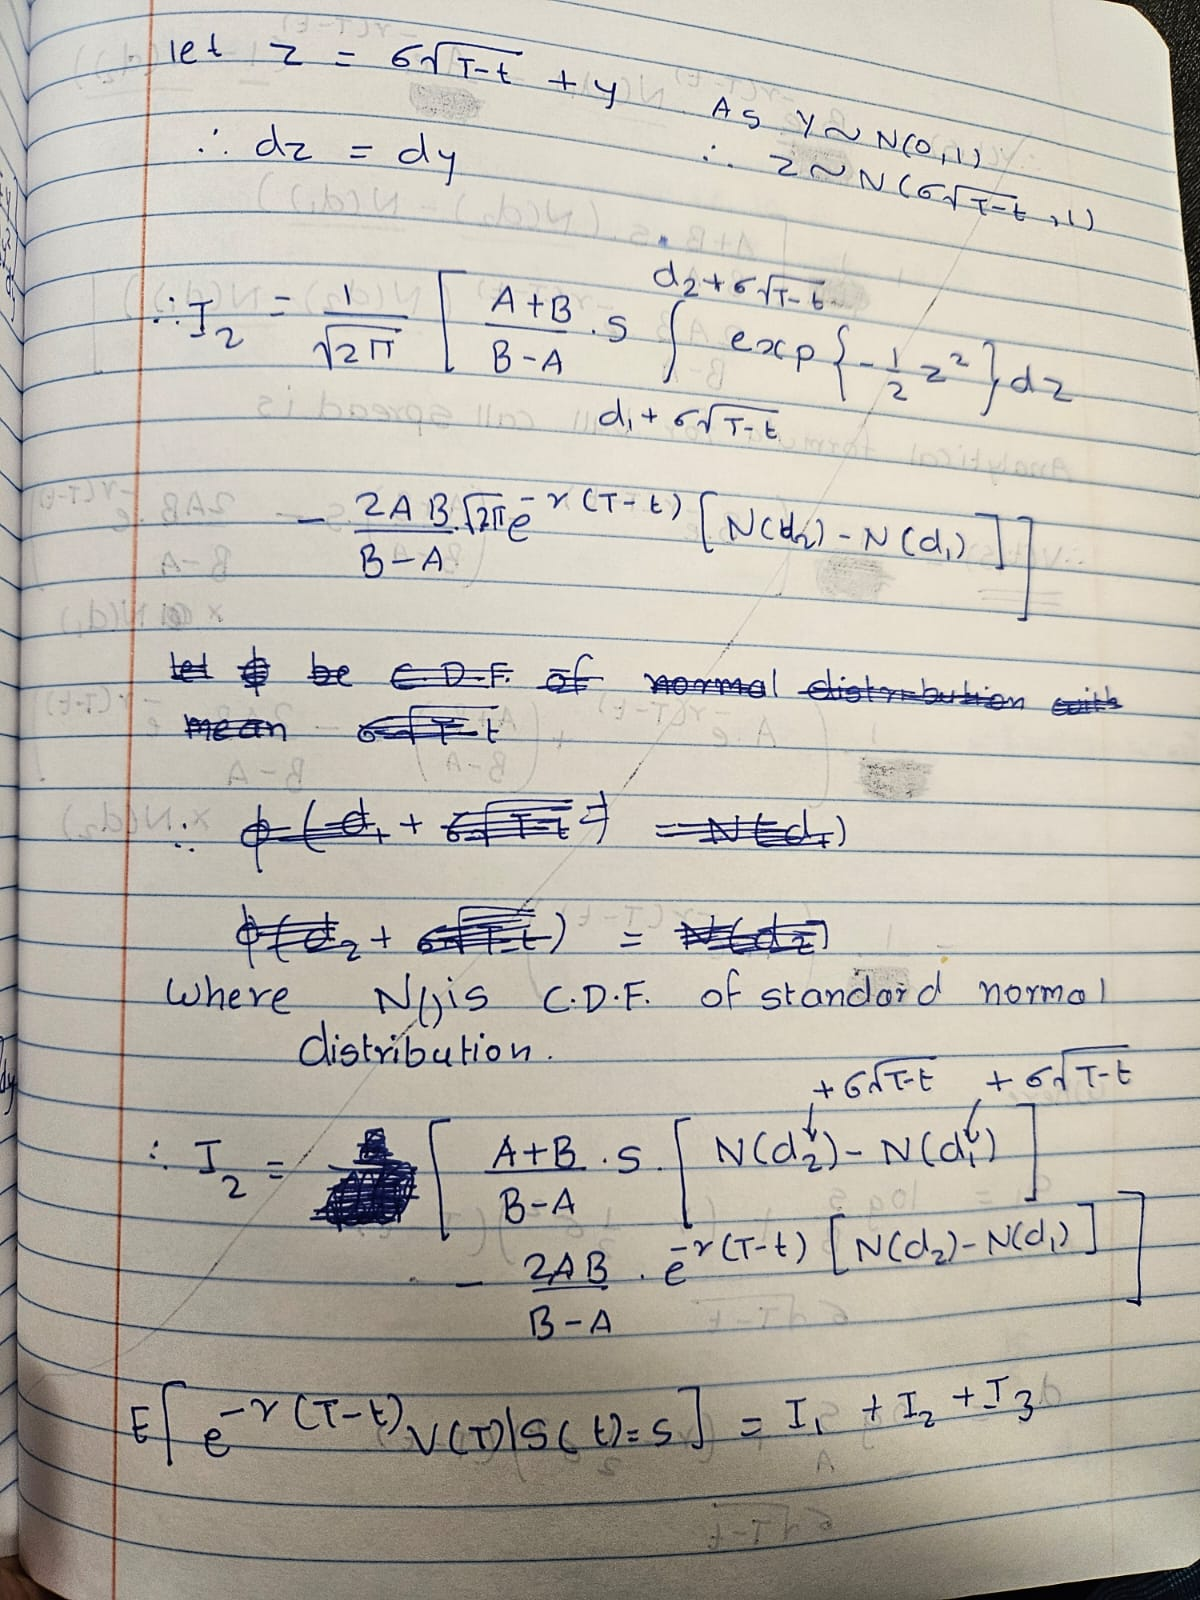

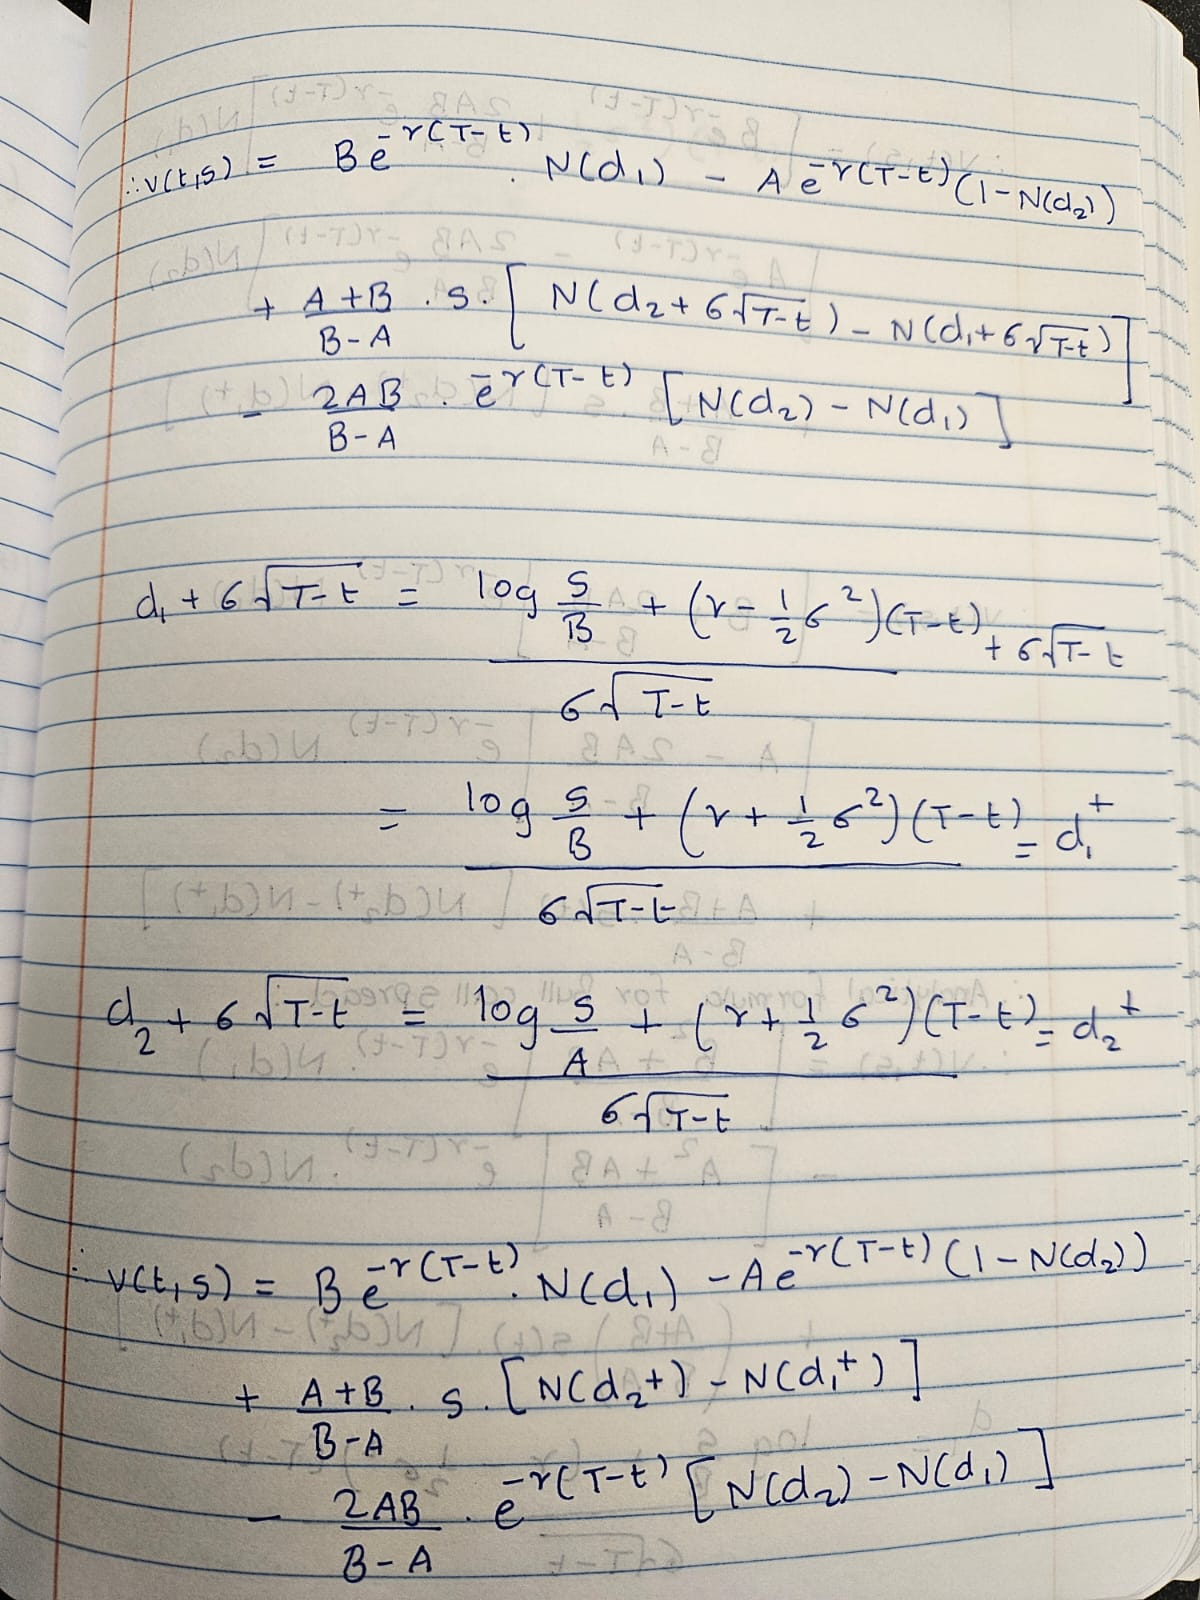

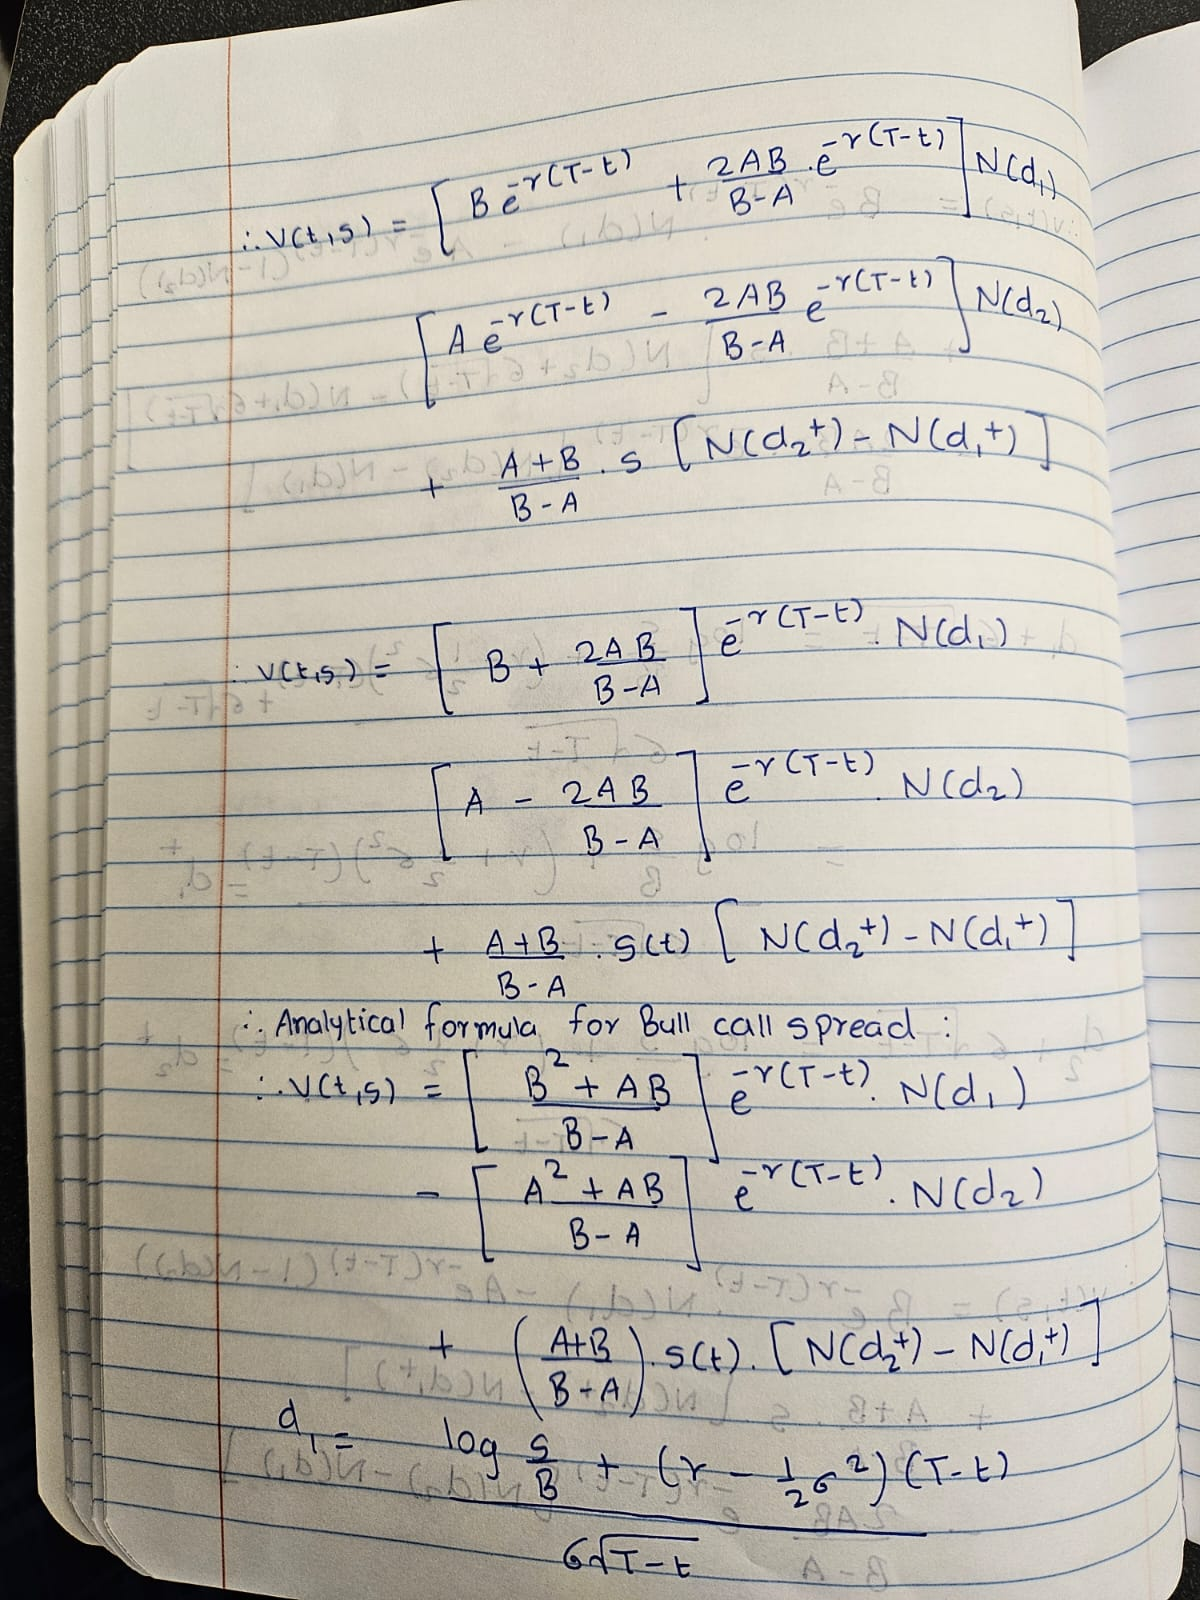

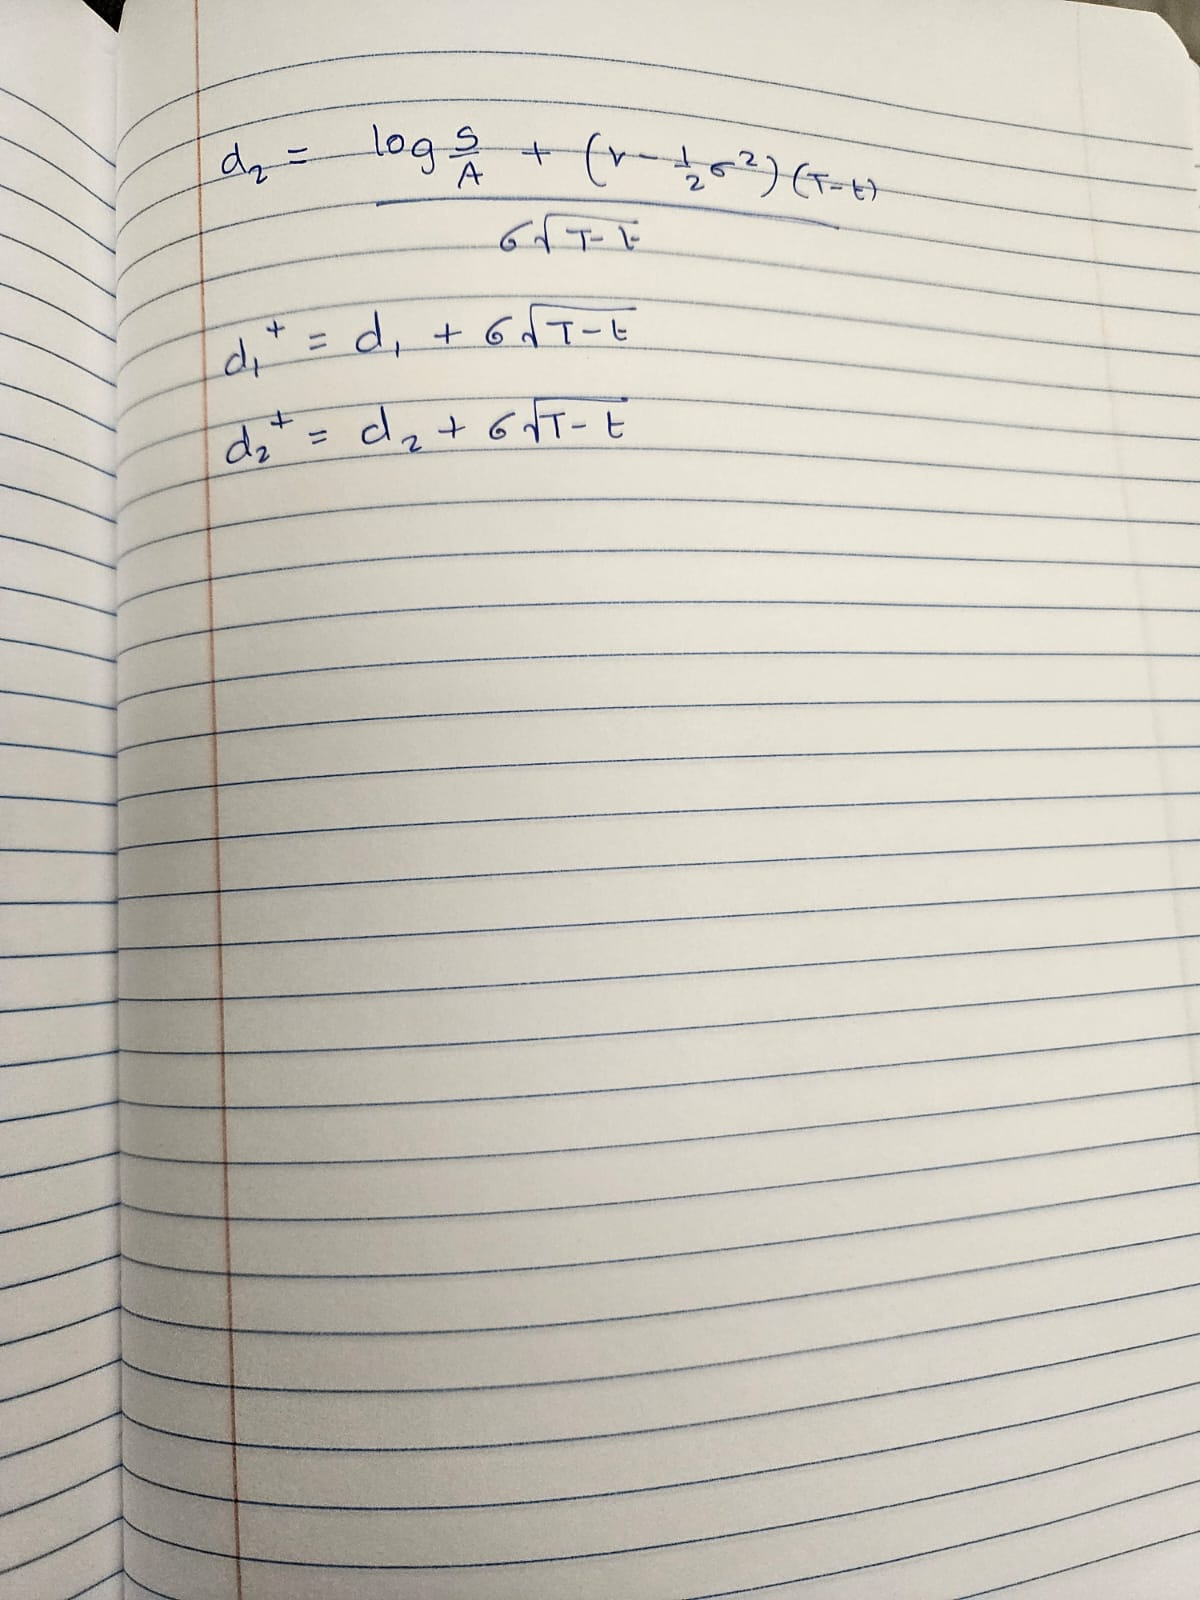